<h1><center>Preview Suicide Data in MIMICIII</center></h1>

### Introduction
This project is to extract and preview the suicide data from MIMICIII database. The suicide data is indicated by the ICD9 codes. The most complete codes should be in the table DIAGNOSES_ICD.

According to Find-A-Code.com (https://www.findacode.com), the suicide related ICD-9 codes are (including suicidal ideation):

| Code(s)         | Description                                                                       |
|-----------------|-----------------------------------------------------------------------------------|
| E950.0 ‑ E950.9 | E950 Suicide and self-inflicted poisoning by solid or liquid substances           |
| E951.0 ‑ E951.8 | E951 Suicide and self-inflicted poisoning by gases in domestic use                |
| E952.0 ‑ E952.9 | E952 Suicide and self-inflicted poisoning by other gases and vapors               |
| E953.0 ‑ E953.9 | E953 Suicide and self-inflicted injury by hanging, strangulation, and suffocation |
| E954 ‑ E954     | E954 Suicide and self-inflicted injury by submersion [drowning]                   |
| E955.0 ‑ E955.9 | E955 Suicide and self-inflicted injury by firearms, air guns and explosives       |
| E956 ‑ E956     | E956 Suicide and self-inflicted injury by cutting and piercing instrument         |
| E957.0 ‑ E957.9 | E957 Suicide and self-inflicted injuries by jumping from high place               |
| E958.0 ‑ E958.9 | E958 Suicide and self-inflicted injury by other and unspecified means             |
| E959 ‑ E959     | E959 Late effects of self-inflicted injury                                        |
| V62.84          | Suicidal ideation                                                                 |

### Extract Suicide Data 
The suicide data is extracted from DIAGNOSES_ICD.csv based on its column "ICD9_CODE".

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil
import datetime as dt
import numpy as np
import math
import seaborn as sns
from __future__ import division

In [3]:
diagnoses_ICD = pd.read_csv("DIAGNOSES_ICD.csv", header=0, sep=",")

In [4]:
#print(diagnoses_ICD.head(100))

In [5]:
diagnoses_ICD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
ROW_ID        651047 non-null int64
SUBJECT_ID    651047 non-null int64
HADM_ID       651047 non-null int64
SEQ_NUM       651000 non-null float64
ICD9_CODE     651000 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [6]:
is_suicide = diagnoses_ICD["ICD9_CODE"].str.contains("V6284|E95", na=False)

In [7]:
sui_diagnoses_ICD = diagnoses_ICD[is_suicide]

In [8]:
print(sui_diagnoses_ICD.head())

      ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
102     1562         119   135738      7.0      E956
350      579          71   111944      4.0     E9503
760      153          22   165315      3.0     E9502
761      154          22   165315      4.0     E9503
2036    3572         303   103013      7.0     E9500


In [9]:
suicide_ICD_list = list(sui_diagnoses_ICD["ICD9_CODE"])

In [10]:
print(len(suicide_ICD_list))

877


There are 877 suicide related ICD codes, including suicidal ideation.
Save the suicide related ICD codes to local storage with filename "suicide_ICD.txt"

In [11]:
with open("suicide_ICD.txt", "w") as f:
    for code in suicide_ICD_list:
        f.write(code +"\n")

### Data Visualization

#### Visualize the number of suicide records and non-suicide records.

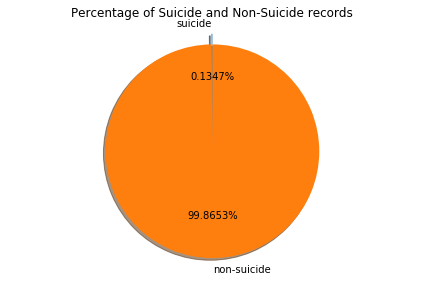

In [12]:
labels = ["suicide", "non-suicide"]
sizes = [len(sui_diagnoses_ICD.index), len(diagnoses_ICD.index)-len(sui_diagnoses_ICD.index)]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.4f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Percentage of Suicide and Non-Suicide records")
plt.tight_layout()
plt.show()

The suicide data only takes 0.1347% of the whole data set.

#### Visualize the categories of the suicide ICD-9 codes.

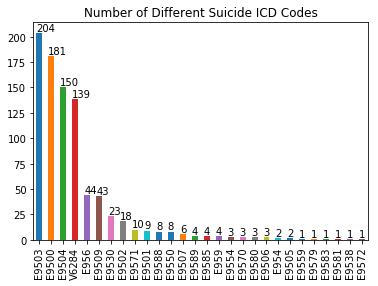

In [13]:
ax = sui_diagnoses_ICD['ICD9_CODE'].value_counts().plot(kind="bar", title="Number of Different Suicide ICD Codes")
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+2,str(i.get_height()))

The top four ICD-9 codes are: E9503, E9500, E9504 and V6284
1. E9503: Poison-psychotropic agt
2. E9500: Poison-analgesics
3. E9504: Poison-drug/medicin NEC
4. V6284: Suicidal ideation

Parse the ICD9 codes and extract the upper category, i.e. "E950" is the upper category of "E9503", and store the value in a new column "Upper_Category".

In [14]:
sui_diagnoses_ICD["Upper_Category"]=sui_diagnoses_ICD["ICD9_CODE"].str.slice().str[0:4]

/home/cs52205/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
print(sui_diagnoses_ICD.head())

      ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE Upper_Category
102     1562         119   135738      7.0      E956           E956
350      579          71   111944      4.0     E9503           E950
760      153          22   165315      3.0     E9502           E950
761      154          22   165315      4.0     E9503           E950
2036    3572         303   103013      7.0     E9500           E950


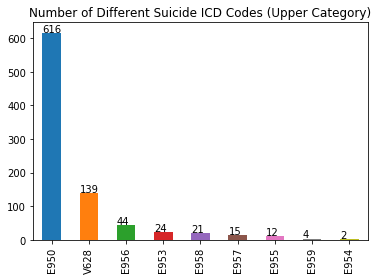

In [16]:
ax2 = sui_diagnoses_ICD['Upper_Category'].value_counts().plot(kind="bar", 
                                                              title="Number of Different Suicide ICD Codes (Upper Category)")
for i in ax2.patches:
    ax2.text(i.get_x(), i.get_height()+2.5,str(i.get_height()))

(-1.1377109276637962,
 1.520832623735541,
 -1.1145146727161235,
 1.1132812249847497)

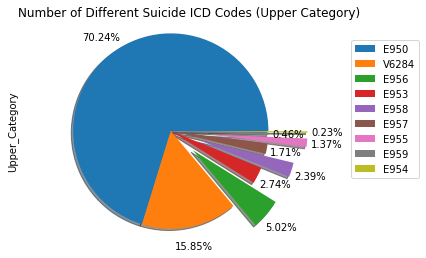

In [17]:
explode = (0.0, 0.0, 0.3, 0.0, 0.3, 0.0, 0.4, 0.0, 0.4)
ax3 = sui_diagnoses_ICD['Upper_Category'].value_counts().plot(kind="pie", labels=None,autopct='%1.2f%%', pctdistance=1.2, 
                                                              labeldistance=1.05,explode=explode,shadow=True,
                                                             title="Number of Different Suicide ICD Codes (Upper Category)")
labels = ["E950", "V6284","E956", "E953", "E958", "E957", "E955", "E959", "E954"]
ax3.legend(labels,loc="right", bbox_to_anchor=(1.2, 0.6))
plt.axis("equal")


The top 3 suicide ICD codes are:

1. E950: Suicide and self-inflicted poisoning by solid or liquid substances
2. V6284: Suicidal ideation
3. E953: Suicide and self-inflicted injury by hanging, strangulation, and suffocation

__The results shows that most of the suicide attempts are by poisoning.__

### Extact Suicide Data from PATIENTS Table

The DIAGONSES_ICD table are connected to the tables PATIENTS AND ADMISSIONS by the foreign key SUBJECT_ID. So extract the SUBJECT_ID is needed.
__SUBJECT_ID is a unique identifier which specifies an individual patient. It is a candidate key for the table, so is unique for each row.__

In [18]:
suicide_subject_ID = list(sui_diagnoses_ICD["SUBJECT_ID"])

In [19]:
len(suicide_subject_ID)

877

In [20]:
len(set(suicide_subject_ID))

596

From the suicide_subject_ID list, there should be 596 patients that have suicide attempts or suicidal ideation.

In [21]:
with open("suicide_subject_ID.txt", "w") as f:
    for ID in suicide_subject_ID:
        f.write(str(ID) +"\n")

In [22]:
patients = pd.read_csv("PATIENTS.csv", header=0, sep=",")

In [23]:
print(patients.head())

   ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0     234         249      F  2075-03-13 00:00:00                  NaN   
1     235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
2     236         251      M  2090-03-15 00:00:00                  NaN   
3     237         252      M  2078-03-06 00:00:00                  NaN   
4     238         253      F  2089-11-26 00:00:00                  NaN   

              DOD_HOSP DOD_SSN  EXPIRE_FLAG  
0                  NaN     NaN            0  
1  2188-11-22 00:00:00     NaN            1  
2                  NaN     NaN            0  
3                  NaN     NaN            0  
4                  NaN     NaN            0  


In [24]:
sui_patients_raw= patients[patients["SUBJECT_ID"].isin(suicide_subject_ID)]

In [25]:
sui_patients_raw.shape

(596, 8)

The number of patients that have suicide attempts or suicidal ideation is 596.

#### Calculate the age of the patients

DOB is the date of birth of the given patient. Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission.

Calculate the age and add to the table, which needs the admissions table.

In [26]:
admissions = pd.read_csv("ADMISSIONS.csv", sep=",", header=0)

In [27]:
print(admissions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null int64
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               5854 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64
dtypes: int64(5), objec

In [28]:
# Convert date from string to date times
admissions['ADMITTIME'] = admissions['ADMITTIME'].apply(dateutil.parser.parse, dayfirst=True)

In [29]:
min_admittime = admissions.groupby("SUBJECT_ID")[['ADMITTIME']].min().reset_index()

In [30]:
type(min_admittime)

pandas.core.frame.DataFrame

In [31]:
min_admittime.head()

,SUBJECT_ID,ADMITTIME
0,2,2138-07-17 19:04:00
1,3,2101-10-20 19:08:00
2,4,2191-03-16 00:28:00
3,5,2103-02-02 04:31:00
4,6,2175-05-30 07:15:00


In [32]:
min_admittime.shape

(46520, 2)

In [33]:
patients_copy = patients.copy()

In [34]:
patients_copy.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [35]:
patients_copy_sorted = patients_copy.sort_values(by="SUBJECT_ID")

In [36]:
print(patients_copy_sorted.head())

     ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
222       1           2      M  2138-07-17 00:00:00                  NaN   
223       2           3      M  2025-04-11 00:00:00  2102-06-14 00:00:00   
224       3           4      F  2143-05-12 00:00:00                  NaN   
225       4           5      M  2103-02-02 00:00:00                  NaN   
226       5           6      F  2109-06-21 00:00:00                  NaN   

    DOD_HOSP              DOD_SSN  EXPIRE_FLAG  
222      NaN                  NaN            0  
223      NaN  2102-06-14 00:00:00            1  
224      NaN                  NaN            0  
225      NaN                  NaN            0  
226      NaN                  NaN            0  


In [37]:
patients_copy_sorted.shape

(46520, 8)

In [38]:
patients_age = patients_copy_sorted.merge(min_admittime, how="inner")

In [39]:
patients_age.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME
0,1,2,M,2138-07-17 00:00:00,NaN,NaN,NaN,0,2138-07-17 19:04:00
1,2,3,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,2101-10-20 19:08:00
2,3,4,F,2143-05-12 00:00:00,NaN,NaN,NaN,0,2191-03-16 00:28:00
3,4,5,M,2103-02-02 00:00:00,NaN,NaN,NaN,0,2103-02-02 04:31:00
4,5,6,F,2109-06-21 00:00:00,NaN,NaN,NaN,0,2175-05-30 07:15:00


Create a new column "AGE" which is the difference between DOB and ADMITTIME.

In [40]:
patients_age["DOB"] = patients_age['DOB'].apply(dateutil.parser.parse, dayfirst=True)

In [41]:
patients_age["AGE"] = np.floor(((patients_age["ADMITTIME"]-patients_age["DOB"])/365/np.timedelta64(1, 'D'))).astype(int)

In [42]:
patients_age.shape

(46520, 10)

In [43]:
patients_age[patients_age["AGE"] > 89]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE


#### Remove the patients older than 89, patients aged 0 and patients of organ or tissue transplant.

For research purpose, these records should be dropped. The organ transplant is indicated by ICD-9 code V42.0-V42.9.

__Remove patients older than 89.__

In the data set, patients older than 89 have their age hidden, indicated by less than 0.

In [44]:
older89 = patients_age[patients_age["AGE"] < 0].index

In [45]:
len(older89)

2052

In [46]:
patients_no_older89 = patients_age.drop(older89)

In [47]:
patients_no_older89.shape

(44468, 10)

In [48]:
patients_no_older89[patients_no_older89["AGE"] <0]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE


The rows of patients aged older than 89 are dropped.

__Remove patients aged 0.__

In [49]:
aged0 = patients_no_older89[patients_no_older89["AGE"]==0].index

In [50]:
len(aged0)

7813

In [51]:
patients_no_older89_aged0 = patients_no_older89.drop(aged0)

In [52]:
patients_no_older89_aged0.shape

(36655, 10)

In [53]:
patients_no_older89_aged0[patients_no_older89_aged0["AGE"]==0]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE


The patients aged 0 are dropped.

__Remove organ or tissue transplant records.__

In [54]:
is_organ_transplant = diagnoses_ICD["ICD9_CODE"].str.contains("V42", na=False)

In [55]:
transplant_subject_ID = list(diagnoses_ICD[is_organ_transplant]["SUBJECT_ID"])

In [56]:
transplant = patients_no_older89_aged0[patients_no_older89_aged0["SUBJECT_ID"].isin(transplant_subject_ID)].index

In [57]:
patients_no_older89_aged0_transplant = patients_no_older89_aged0.drop(transplant)

In [58]:
patients_no_older89_aged0_transplant.shape

(35830, 10)

In [59]:
patients_no_older89_aged0_transplant[patients_no_older89_aged0_transplant["SUBJECT_ID"].isin(transplant_subject_ID)]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE


The organ or tissue transplant records are dropped.

In [60]:
patients_clean = patients_no_older89_aged0_transplant.copy()

In [61]:
patients_clean.shape

(35830, 10)

In [62]:
patients_clean.to_csv("patients_clean.csv")

The patients_clean dataframe is saved to local directory.

### Visualize the patients_clean table.

__Examine the age distribution.__

In [63]:
print(patients_clean["AGE"].min())
print(patients_clean["AGE"].max())

14
89


/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


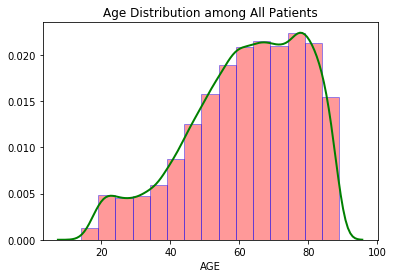

In [64]:
sns.distplot(patients_clean['AGE'], hist=True, kde=True, 
             bins=15, color = 'red', 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2, "color":"green"})
plt.title("Age Distribution among All Patients")
plt.show()

Each bin is about 5 years.

In the tables, the patients are aged from 14 to 89. The largest age group is ranged from 58-89.

In [65]:
sui_patients = patients_clean[patients_clean["SUBJECT_ID"].isin(suicide_subject_ID)]

In [66]:
sui_patients.shape

(586, 10)

In [67]:
print(sui_patients["AGE"].min())
print(sui_patients["AGE"].max())

16
85


/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Age Distribution Among Patients with Suicide Attempts')

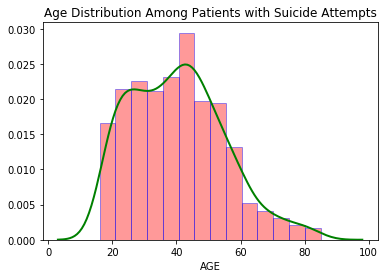

In [68]:
sns.distplot(sui_patients['AGE'], hist=True, kde=True, 
             bins=14, color = 'red', 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2, "color":"green"})
plt.title("Age Distribution Among Patients with Suicide Attempts")

Each bin is 5 years.

From the result, we can see the suicide attempts is mainly among patients aged 16 to 60, with the peak at age 41 to 46. From age 55 and older, the suicide rate drops dramatically.

/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


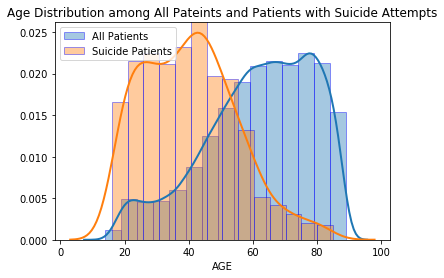

In [69]:
x = patients_clean["AGE"]
y = sui_patients["AGE"]
fig, ax = plt.subplots()
for a in [x, y]:
    if a is x:
        sns.distplot(a, hist=True, kde=True, 
             bins=15, 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2}, label="All Patients")
    else:
        sns.distplot(a, hist=True, kde=True, 
             bins=14, 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2}, label="Suicide Patients")
ax.legend()
plt.title("Age Distribution among All Pateints and Patients with Suicide Attempts")
plt.show()

__Calculate the suicide rate__

In [70]:
num_suicide = len(sui_patients.index)

In [71]:
num_patients = len(patients_clean.index)

In [72]:
suicide_rate = round(num_suicide/num_patients, 4)

In [73]:
suicide_rate

0.0164

The suicide rate is 0.0164, which is 1.64%. Among 100 patients in the data set, there are a least 1 patient has suicide attempt.

#### Visualize the distribution by gender.

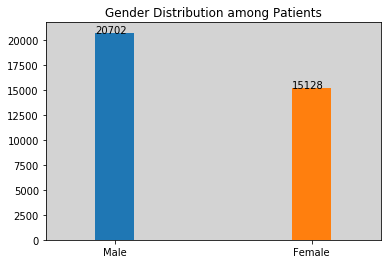

In [74]:
ax5 = patients_clean["GENDER"].value_counts().plot(kind="bar", title="Gender Distribution among Patients", width=0.2)
for i in ax5.patches:
    ax5.text(i.get_x(), i.get_height()+3,str(i.get_height()))
ax5.set_xticklabels(["Male", "Female"],rotation="horizontal")
ax5.set_facecolor('lightgrey')

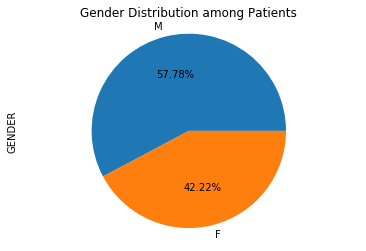

In [75]:
patients_clean["GENDER"].value_counts().plot(kind="pie", title="Gender Distribution among Patients", autopct='%1.2f%%')
plt.axis("equal")
plt.show()

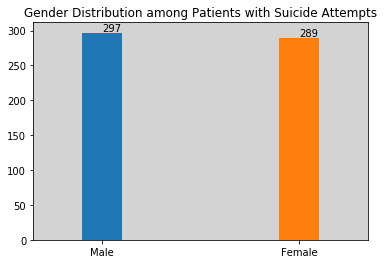

In [76]:
ax4 = sui_patients["GENDER"].value_counts().plot(kind="bar", title="Gender Distribution among Patients with Suicide Attempts", width=0.2)
for i in ax4.patches:
    ax4.text(i.get_x()+0.1, i.get_height()+2.5,str(i.get_height()))
ax4.set_xticklabels(["Male", "Female"],rotation="horizontal")
ax4.set_facecolor('lightgrey')

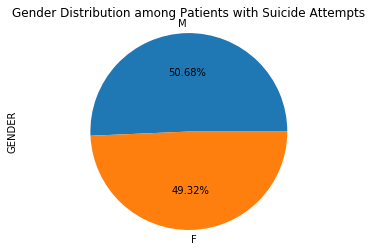

In [77]:
sui_patients["GENDER"].value_counts().plot(kind="pie", title="Gender Distribution among Patients with Suicide Attempts", autopct='%1.2f%%')
plt.axis("equal")
plt.show()

The number of male patients is slightly greater than female, probably because there are more male patients in the whole data set.

__Calculate male suicide rate and female suicide rate.__

In [78]:
num_male_suicide = len(sui_patients[sui_patients["GENDER"]=="M"].index)
num_male = len(patients_clean[patients_clean["GENDER"]=="M"].index)
male_suicide_rate = round(num_male_suicide/num_male, 4)

In [79]:
male_suicide_rate

0.0143

In [80]:
num_female_suicide = len(sui_patients[sui_patients["GENDER"]=="F"].index)
num_female = len(patients_clean[patients_clean["GENDER"]=="F"].index)
female_suicide_rate = round(num_female_suicide/num_female, 4)

In [81]:
female_suicide_rate

0.0191

Text(0.5,1,'Suicide Rate between Genders')

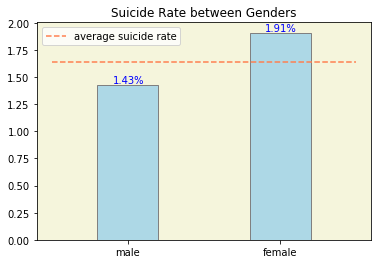

In [82]:
heights = [male_suicide_rate*100, female_suicide_rate*100]
bars=("male", "female")
y_pos=[0.5, 1.5]
fig, ax = plt.subplots()
ax.bar(y_pos, heights, width=0.4, tick_label=bars, color="lightblue", edgecolor="grey")
ax.plot([0, len(heights)], [suicide_rate*100, suicide_rate*100], "--", color="coral",
        label="average suicide rate")
ax.legend()
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+0.015,str(i.get_height())+"%", color = "blue")
ax.set_facecolor("beige")
plt.title("Suicide Rate between Genders")

The suicide rate among female patients is 1.91%. And the suicide rate among male patients is 1.43%.

### Explore the suicide attempts and gender relationship.
Find out the suicide method of each patient who had suicide attempts. The suicide attempt methods are indicated by ICD-9 codes. For instance, E950 is suicide and self-inflicted poisoning by solid or liquid substances. This section is to devide female and male patients by suicide methods.

In [83]:
sui_diagnoses_ICD_subset = sui_diagnoses_ICD[["SUBJECT_ID", "ICD9_CODE"]]

In [84]:
sui_diagnoses_ICD_subset.head()

,SUBJECT_ID,ICD9_CODE
102,119,E956
350,71,E9503
760,22,E9502
761,22,E9503
2036,303,E9500


In [85]:
sui_patients_copy = sui_patients[["SUBJECT_ID", "GENDER"]].copy()

In [86]:
sui_patients_copy.head()

,SUBJECT_ID,GENDER
18,22,F
63,71,F
109,119,M
283,303,M
422,449,F


Merge sui_patients_copy and sui_diagnoses_ICD_subset by SUBJECT_ID.

In [87]:
sui_methods = sui_patients_copy.merge(sui_diagnoses_ICD_subset, how="outer", on ="SUBJECT_ID")

In [88]:
sui_methods = sui_methods.dropna()

In [89]:
sui_methods.head()

,SUBJECT_ID,GENDER,ICD9_CODE
0,22,F,E9502
1,22,F,E9503
2,71,F,E9503
3,119,M,E956
4,303,M,E9500


In [90]:
sui_methods["ICD9_CODE"].nunique()

28

In the table, there are 28 different ICD-9 codes.

In [91]:
pd.set_option("display.max_columns", 30)

In [92]:
sui_methods_pivot=sui_methods.pivot_table(index="GENDER", columns="ICD9_CODE", aggfunc="count", fill_value=0)

In [93]:
sui_methods_pivot

SUBJECT_ID                                                        \
ICD9_CODE      E9500 E9501 E9502 E9503 E9504 E9505 E9506 E9507 E9509 E9530   
GENDER                                                                       
F                119     5     9   109    81     0     2     3    22     7   
M                 61     4     9    93    69     2     1     3    20    16   

                                                                           \
ICD9_CODE E9538 E954 E9550 E9554 E9559 E956 E9570 E9571 E9572 E9579 E9580   
GENDER                                                                      
F             0    0     1     1     0   12     1     3     0     0     2   
M             1    2     6     2     1   31     2     7     1     1     1   

                                                    
ICD9_CODE E9581 E9583 E9585 E9588 E9589 E959 V6284  
GENDER                                              
F             0     0     1     3     1    1    52  
M             1     1     3     5     3    3    80

In [94]:
sui_methods_groupby = sui_methods.groupby(["ICD9_CODE", "GENDER"]).size().unstack(fill_value=0)

In [95]:
sui_methods_groupby.columns = ["Female", "Male"]

In [96]:
sui_methods_groupby

,Female,Male
ICD9_CODE,,
E9500,119,61
E9501,5,4
E9502,9,9
E9503,109,93
E9504,81,69
E9505,0,2
E9506,2,1
E9507,3,3
E9509,22,20


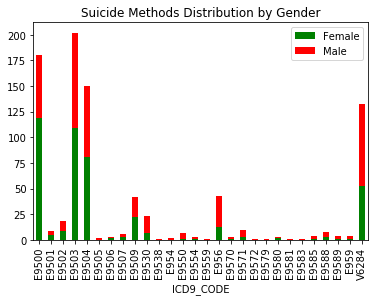

In [97]:
sui_methods_groupby.plot.bar(stacked=True, color=("green", "red"))
plt.title("Suicide Methods Distribution by Gender")
plt.show()

Interpret some outstanding bars:
1. E9503 - Suicide and self-inflicted poisoning by tranquilizers and other psychotropic agents: there are more female patients use this method than male patients.
2. E9500 - Suicide and self-inflicted poisoning by analgesics, antipyretics, and antirheumatics: there are more female patients use this method than male patients.
3. E9504 - Suicide and self-inflicted poisoning by other specified drugs and medicinal substances: there are more female patients use this method than male patients.
4. V6284 - Suicidal ideation: there are more male patients than female patients.
5. E956 - Suicide and self-inflicted injury by cutting and piercing instrument: there are more male patients than female patients.

In [98]:
sui_methods_copy = sui_methods.copy()

In [99]:
sui_methods_copy["Upper_Category"]=sui_methods_copy["ICD9_CODE"].str.slice().str[0:4]

In [100]:
sui_methods_copy.head()

,SUBJECT_ID,GENDER,ICD9_CODE,Upper_Category
0,22,F,E9502,E950
1,22,F,E9503,E950
2,71,F,E9503,E950
3,119,M,E956,E956
4,303,M,E9500,E950


In [101]:
sui_methods_pivot2=sui_methods_copy.pivot_table(index="GENDER", columns="Upper_Category", aggfunc="count", fill_value=0)

In [102]:
sui_methods_pivot2

ICD9_CODE                                         SUBJECT_ID  \
Upper_Category      E950 E953 E954 E955 E956 E957 E958 E959 V628       E950   
GENDER                                                                        
F                    350    7    0    2   12    4    7    1   52        350   
M                    262   17    2    9   31   11   14    3   80        262   

                                                        
Upper_Category E953 E954 E955 E956 E957 E958 E959 V628  
GENDER                                                  
F                 7    0    2   12    4    7    1   52  
M                17    2    9   31   11   14    3   80

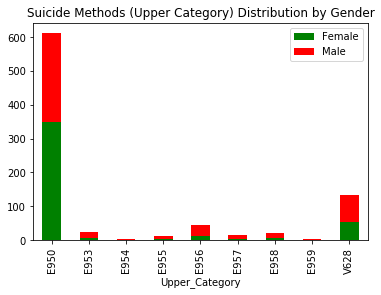

In [103]:
sui_methods_groupby2 = sui_methods_copy.groupby(["Upper_Category", "GENDER"]).size().unstack(fill_value=0)
sui_methods_groupby2.columns=["Female", "Male"]
sui_methods_groupby2.plot.bar(stacked=True, color=("green", "red"))
plt.title("Suicide Methods (Upper Category) Distribution by Gender")
plt.show()

In the result, E950 - Suicide and self-inflicted poisoning by solid or liquid substances: more female than male.
V6284 - Suicide ideation: more male than female.

__The numbers displayed in the above two bar plots are based on ICD-9 codes. One subject ID, which is the same patient, may have more than one ICD-9 codes. This explains why the number of female in the last two plots are more than the number of male. In the previous plots, we learn that the number of male patients who have suicide attempts are more than female patients.__